# New York City Taxi Rides

Author: Natalie Martinez

Course Project, UC Irvine, Math 10, F22

## Introduction 

This project is centered around a Seaborn dataset about taxi rides in New York City. Throughout the project, tests will be used to determine relationships between numerical and categorical elements and how strong those relationships are. Depending on the relationships between various elements, test accuracy levels will establish what elements are most effective in forming predictions of potential taxi rides. 

## Import and Clean the Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset("taxis")

Remove any rows with missing values.

In [3]:
df.dropna(inplace=True)

Remove any columns that will not be used throughout the project.

In [4]:
df.drop(columns = ["pickup", "dropoff", "color", "payment", "pickup_zone", "dropoff_zone", "pickup_borough"], inplace=True)

In [5]:
df

passengers  distance  fare   tip  tolls  total dropoff_borough
0              1      1.60   7.0  2.15    0.0  12.95       Manhattan
1              1      0.79   5.0  0.00    0.0   9.30       Manhattan
2              1      1.37   7.5  2.36    0.0  14.16       Manhattan
3              1      7.70  27.0  6.15    0.0  36.95       Manhattan
4              3      2.16   9.0  1.10    0.0  13.40       Manhattan
...          ...       ...   ...   ...    ...    ...             ...
6428           1      0.75   4.5  1.06    0.0   6.36       Manhattan
6429           1     18.74  58.0  0.00    0.0  58.80           Bronx
6430           1      4.14  16.0  0.00    0.0  17.30        Brooklyn
6431           1      1.12   6.0  0.00    0.0   6.80        Brooklyn
6432           1      3.85  15.0  3.36    0.0  20.16        Brooklyn

[6341 rows x 7 columns]

## Linear Regression

**Objective 1: Predict the distance traveled by a taxi based on passengers, fare, tolls, and drop off borough information using Linear Regression.**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [7]:
cols = ["passengers", "fare", "tolls"]

In order to use the dropoff_borough column in the linear regression, we must convert the borough categories into numerical values by using One Hot Encoder. 

In [8]:
encoder = OneHotEncoder()

In [9]:
encoder.fit(df[["dropoff_borough"]])

OneHotEncoder()

In [10]:
borough_cols = list(encoder.get_feature_names_out())
borough_cols

['dropoff_borough_Bronx',
 'dropoff_borough_Brooklyn',
 'dropoff_borough_Manhattan',
 'dropoff_borough_Queens',
 'dropoff_borough_Staten Island']

In [11]:
encoder.fit_transform(df[["dropoff_borough"]])

<6341x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6341 stored elements in Compressed Sparse Row format>

In [12]:
encoder.fit_transform(df[["dropoff_borough"]]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Create a new dataframe that includes the numerical values assigned to each borough.

In [13]:
df2 = df.copy()
df2[borough_cols] = encoder.transform(df[["dropoff_borough"]]).toarray()

An intercept is not necessary since the coefficient corresponding to the borough will act as the intercept.


In [14]:
reg = LinearRegression(fit_intercept=False)

In [15]:
reg.fit(df2[cols+borough_cols], df["distance"])

LinearRegression(fit_intercept=False)

In [16]:
ser = pd.Series(reg.coef_, index=reg.feature_names_in_)
for feature in ser.index: 
    print(f'The coefficient of {feature} is {ser[feature]:.6}.')

The coefficient of passengers is 0.0247452.
The coefficient of fare is 0.303964.
The coefficient of tolls is 0.256554.
The coefficient of dropoff_borough_Bronx is -0.451096.
The coefficient of dropoff_borough_Brooklyn is -0.898069.
The coefficient of dropoff_borough_Manhattan is -1.10734.
The coefficient of dropoff_borough_Queens is -0.653537.
The coefficient of dropoff_borough_Staten Island is -1.39054.


Predict the distance of a data point using our linear regression model and compare it to the actual distance to see how accurate our linear regression model is.

In [17]:
df2.loc[2300, cols+borough_cols]

passengers                         1
fare                             8.5
tolls                            0.0
dropoff_borough_Bronx            0.0
dropoff_borough_Brooklyn         0.0
dropoff_borough_Manhattan        1.0
dropoff_borough_Queens           0.0
dropoff_borough_Staten Island    0.0
Name: 2300, dtype: object

In [18]:
reg.predict(df2.loc[[2300], cols+borough_cols])

array([1.50110394])

In [19]:
df2.loc[2300, "distance"]

1.8

**Analysis** 
The predicted value of distance was fairly close to the actual distance traveled, therefore I can say that the number of passengers, the fare, tolls used, and the drop off borough are useful in predicting the total distance during a taxi ride. In addition, we can use the information from this Linear Regression to form an equation to predict the distance a taxi traveled, in this case it is distance = 0.024745(# of passengers) +  0.303964(fare) +  0.256554(tolls) + 1(coefficient of the corresponding borough), this equation is a mathematical representation of what our linear regression model is doing to predict the distance.

## Decision Tree Classifier

**Objective 2: Predict which borough the taxi will drop off its passengers at using a Decision Tree Classifier.**

In [20]:
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import altair as alt

Find all the columns with numerical values

In [21]:
features = [c for c in df.columns if is_numeric_dtype(df[c]) == True]
features

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

In [22]:
X = df[features]
y = df["dropoff_borough"]

Separate the data into a test set and a training set.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

Instantiate the DecisionTreeClassifier and use it to fit the training data.

In [24]:
clf = DecisionTreeClassifier(max_leaf_nodes=22)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=22)

Find the accuracy of the training and test data.

In [26]:
clf.score(X_train, y_train)

0.8300035050823694

In [27]:
clf.score(X_test, y_test)

0.8015748031496063

Visual Representation of the Classification

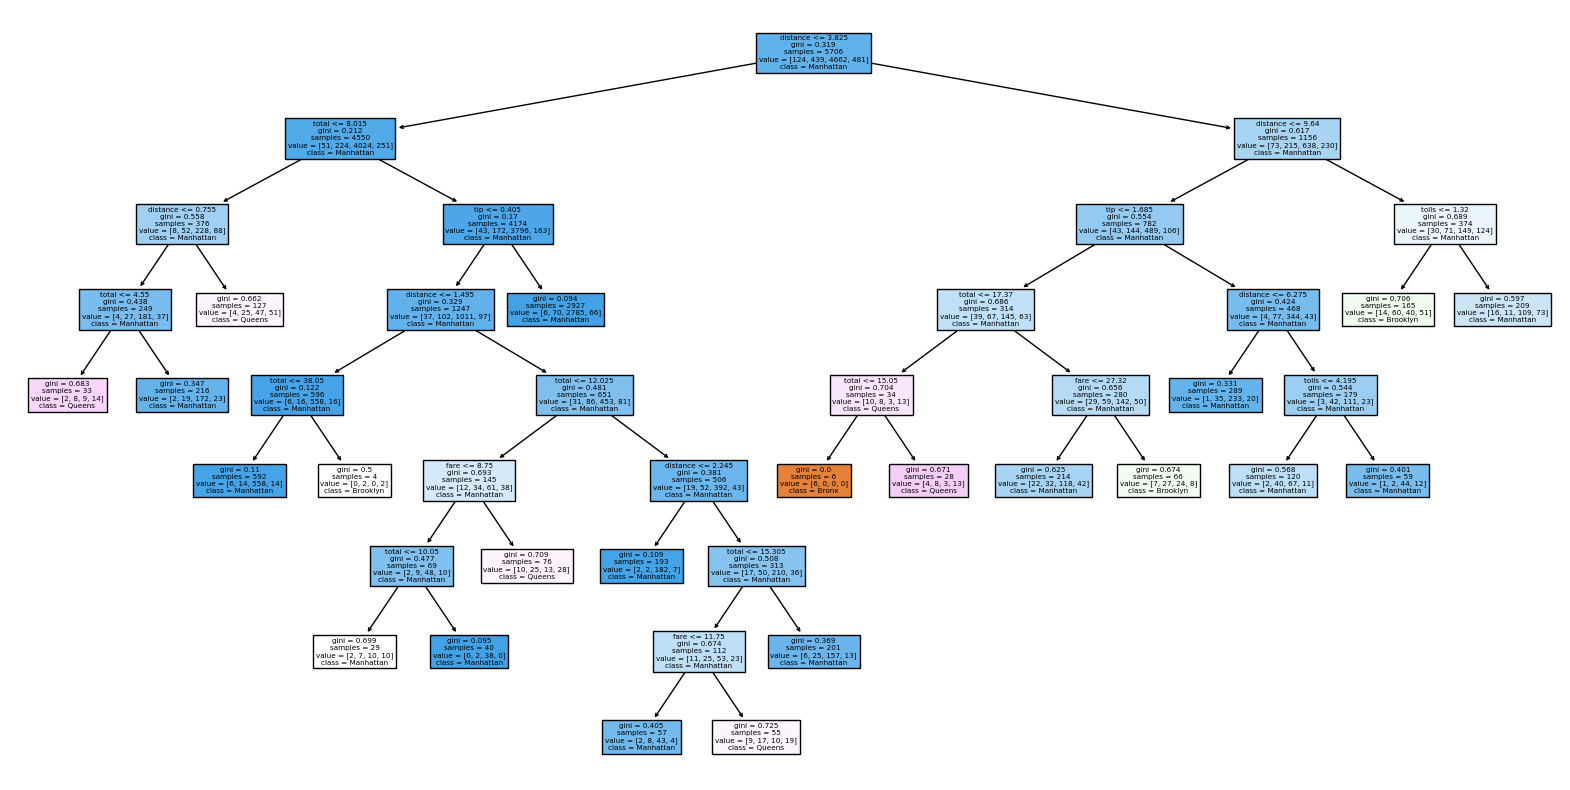

In [28]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)


In the decision tree, Manhattan appears a lot more than any other borough and the reason for that is simply because it is the most common drop off borough in the data. In order to understand the extent of Manhattan's popularity compared to the other boroughs, see the graphs below:

[Disable Max Rows in Altair](https://altair-viz.github.io/user_guide/faq.html): Disable the default limit of rows in altair in order to include all the data points in the graph.

In [29]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

[Altair Chart Interactivity Resource](https://altair-viz.github.io/altair-tutorial/notebooks/06-Selections.html)

In [30]:
click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(df).mark_point().encode(
    x=alt.X('distance', scale=alt.Scale(domain=(0,40))),
    y=alt.Y('total', scale=alt.Scale(domain=(0,180))),
    color='dropoff_borough'
).transform_filter(
    click
)

hist = alt.Chart(df).mark_bar().encode(
    x='dropoff_borough',
    y='count()',
    color=alt.condition(click, 'dropoff_borough', alt.value('lightgray')), 
    tooltip=["count()"]
).add_selection(
    click
)


alt.concat(hist, scatter)

alt.ConcatChart(...)

In the visual representation above, the Manhattan data points make up most of the scatter plot by far compared to the other boroughs.

In [31]:
interval = alt.selection_interval()

scatter2 = alt.Chart(df).mark_point().encode(
    x='distance',
    y='total',
    color=alt.condition(interval, 'dropoff_borough', alt.value('lightgray'))
).add_selection(
    interval
)

hist2 = alt.Chart(df).mark_bar().encode(
    x='dropoff_borough',
    y='count()',
    color='dropoff_borough'
).transform_filter(
    interval
)

alt.concat(scatter2, hist2)

alt.ConcatChart(...)

No matter the size of the selected interval, the bar graph will most frequently display the borough of Manhattan as having the highest count when the selected interval rectangle is moved throughout the scatter plot.

**Analysis**
Since the test set has about an 80% accuracy we can say that it is performing well, therefore the is a fair correlation between the numerical columns of the dataset and the dropoff_borough column. In addition, the accuracy of the training set is within 3% of the test set, so the decision tree does not appear to be overfitting the data. Overall, most of the decision tree leaves belong to the New York City borough of Manhattan, but that makes sense because it is the drop off borough that makes up the majority of the data.

## Logistic Regression

**Objective 3: Find out whether the taxi drop off borough is Queens or not using Logistic Regression.**

In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [33]:
df_lg = df.copy()
df_lg.drop(columns=["passengers", "tip", "tolls", "total"], inplace=True)

In [34]:
df_lg.head(5)

distance  fare dropoff_borough
0      1.60   7.0       Manhattan
1      0.79   5.0       Manhattan
2      1.37   7.5       Manhattan
3      7.70  27.0       Manhattan
4      2.16   9.0       Manhattan

In [35]:
cols_lg = ["distance", "fare"]

Visual representation of the two selected columns for logistic regression and the data points' corresponding drop off borough. 

In [36]:
alt.Chart(df_lg).mark_circle().encode(
    x=alt.X("distance", scale=alt.Scale(zero=False)),
    y=alt.Y("fare", scale=alt.Scale(zero=False)),
    color="dropoff_borough"
).interactive()

alt.Chart(...)

In [37]:
df_lg["is_Queens"] = (df["dropoff_borough"] == "Queens")

In [38]:
df_lg.sample(5)

distance  fare dropoff_borough  is_Queens
4874      3.90  15.5       Manhattan      False
1580      3.35  12.0       Manhattan      False
4232      2.47  18.5       Manhattan      False
3117      2.21  10.0       Manhattan      False
2577      1.30   7.0       Manhattan      False

The goal is that the logistic regression model will predict a true value for all the data points corresponding Queens and a false value for all other boroughs. If our logistic regression model is accurate, then inputting values from the dataset should correspond to the true and false portrayal in the graph below.

In [39]:
alt.Chart(df_lg).mark_circle().encode(
    x=alt.X("distance", scale=alt.Scale(zero=False)),
    y=alt.Y("fare", scale=alt.Scale(zero=False)),
    color="is_Queens"
).interactive()

alt.Chart(...)

Divide the data into a training set and a test set.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_lg[cols_lg], df_lg["is_Queens"], test_size= 0.1, random_state=10)

In [41]:
clf2 = LogisticRegression()

In [42]:
clf2.fit(X_train, y_train)

LogisticRegression()

In [43]:
clf2.predict(X_test)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Find the level of accuracy of each set.

In [44]:
clf2.score(X_test, y_test)

0.9039370078740158

In [45]:
clf2.score(X_train, y_train)

0.9146512443042412

In [46]:
clf2.coef_

array([[ 0.16273506, -0.00790209]])

In [47]:
clf2.feature_names_in_

array(['distance', 'fare'], dtype=object)

In [48]:
distance_coef, fare_coef = clf2.coef_[0]

In this case, the first coefficient in the clf2.coef_ array corresponds to distance and the second coefficient corresponds to fare.

In [49]:
clf2.intercept_

array([-2.92658297])

Select a data point to test out the logistic regression model. 

In [50]:
df_lg.loc[898]

distance                 1.2
fare                    10.0
dropoff_borough    Manhattan
is_Queens              False
Name: 898, dtype: object

In [51]:
distance = 1.2 
fare = 10

Predict the probability that this data point belongs to the drop off borough of Queens or not. The use of the sigmoid shows the mathematical process used to obtain the same prediction that predict_proba produces.

In [52]:
sigmoid = lambda x: 1/(1+np.exp(-x))

In [53]:
distance_coef*distance + fare_coef*fare +clf2.intercept_

array([-2.81032185])

In [54]:
sigmoid(distance_coef*distance + fare_coef*fare +clf2.intercept_)

array([0.05676894])

In [55]:
clf2.predict_proba([[distance, fare]])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.94323106, 0.05676894]])

Our model predicts that our taxi will only have about 5.67% chance of dropping off its passengers in Queens. 

In [56]:
clf2.predict([[distance, fare]])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([False])

This produces False because our model is predicting that this particular taxi will not drop off its passengers in Queens.

**Analysis**
The test set has a high accuracy of 90.3%, which means that our logistic regression model is a good one. Additionaly, the performance of the training set is less than 2% better than that of the test set, so there is not much concern about overfitting. By assigning values to distance and fare, the logic regression model can then take those values and predict whether the taxi dropped off its passengers in Queens or not. Overall, distance and fare appear to be good indicators of whether or not a taxi dropped off its passengers in Queens or not due to the high performance level of this logistic regression model. 

## Summary

I had three main objectives throughout this project to help me gain a better understanding of this New York City taxi rides dataset. To begin, I used Linear Regression to predict the total distance traveled by a taxi in a given ride. My next objective was to find out if I could predict the borough in which a taxi would drop off its passengers using a Decision Tree Classifier. Lastly, I made use of Logistic Regression to determine whether a taxi dropped off its passengers in the New York City borough of Queens or not.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
I obtained the New York City taxi rides dataset from the Python library Seaborn. 

* List any other references that you found helpful.
Code from course notes and worksheets were a great help in the completion of this project.
[Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
[Logistic Regression Video](https://youtu.be/XnOAdxOWXWg)
[Interactive Altair Charts](https://altair-viz.github.io/altair-tutorial/notebooks/06-Selections.html)
[Disable Max Rows in Altair](https://altair-viz.github.io/user_guide/faq.html)
[Limit Decimal Places](https://www.geeksforgeeks.org/precision-handling-python/)
[F-strings](https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/)


## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe2a7ead-0115-4b1d-be34-0f832bcfc85c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>